# DeepLabCut Toolbox - Open-Field DEMO
https://github.com/AlexEMG/DeepLabCut

Nath\*, Mathis\* et al. *Using DeepLabCut for markerless pose estimation during behavior across species
https://www.biorxiv.org/content/10.1101/476531v1

This notebook demonstrates the use of the DeepLabCut toolbox for a provided demo dataset based on "DeepLabCut: markerless pose estimation of user-defined body parts with deep learning" https://www.nature.com/articles/s41593-018-0209-y

This notebook illustrates how to:
- plot the labeled images
- train a network
- evaluate a network
- analyze a novel video
- create an automatically labeled video 
- plot the trajectories 
- identify outlier frames
- annotate the outlier frames manually
- merge the data sets and update the training set
- train a network

Note: This notebook starts from an already initialized project with labeled data.

 Note: The noteboks will not work (simply) in Docker, as Docker is designed to not display GUIs. Please follow the steps outlined here: https://github.com/AlexEMG/DeepLabCut/blob/master/docs/UseOverviewGuide.md#option-2-using-terminal-start-python

In [1]:
# Importing the toolbox (takes several seconds)
import deeplabcut

In [2]:
# Loading example data set 
import os
# Note that parameters of this project can be seen at: *Reaching-Mackenzie-2018-08-30/config.yaml*
from pathlib import Path
path_config_file = os.path.join(os.getcwd(),'openfield-Pranav-2018-10-30/config.yaml')
deeplabcut.load_demo_data(path_config_file)

Loaded, now creating training data...
The training dataset is successfully created. Use the function 'train_network' to start training. Happy training!


In [3]:
#Perhaps plot the labels to see how the frames were annotated:
deeplabcut.check_labels(path_config_file)

Creating images with labels by Pranav.
They are stored in the following folder: /home/mackenzie/DEEPLABCUT/DeepLabCut2.0/examples/openfield-Pranav-2018-10-30/labeled-data/m4s1_labeled.
If all the labels are ok, then use the function 'create_training_dataset' to create the training dataset!


## Start training of Feature Detectors
This function trains the network for a specific shuffle of the training dataset. The user can set various parameters in */Reaching-Mackenzie-2018-08-30/dlc-models/ReachingAug30-trainset95shuffle1/iteration-0/train/pose_cfg.yaml*. 

Training can be stopped at any time. Note that the weights are only stored every 'save_iters' steps. For this demo the state it is advisable to store & display the progress very often. In practice this is inefficient.  

In [5]:
deeplabcut.train_network(path_config_file, shuffle=1, displayiters=10, saveiters=100)

Config:
{'all_joints': [[0], [1], [2], [3]],
 'all_joints_names': ['snout', 'leftear', 'rightear', 'tailbase'],
 'batch_size': 1,
 'bottomheight': 400,
 'crop': True,
 'crop_pad': 0,
 'cropratio': 0.4,
 'dataset': 'training-datasets/iteration-0/UnaugmentedDataSet_openfieldOct30/openfield_Pranav95shuffle1.mat',
 'dataset_type': 'default',
 'display_iters': 1000,
 'fg_fraction': 0.25,
 'global_scale': 0.8,
 'init_weights': '/home/mackenzie/anaconda3/envs/DLC2/lib/python3.6/site-packages/deeplabcut/pose_estimation_tensorflow/models/pretrained/resnet_v1_50.ckpt',
 'intermediate_supervision': False,
 'intermediate_supervision_layer': 12,
 'leftwidth': 400,
 'location_refinement': True,
 'locref_huber_loss': True,
 'locref_loss_weight': 0.05,
 'locref_stdev': 7.2801,
 'log_dir': 'log',
 'max_input_size': 1500,
 'mean_pixel': [123.68, 116.779, 103.939],
 'metadataset': 'training-datasets/iteration-0/UnaugmentedDataSet_openfieldOct30/Documentation_data-openfield_95shuffle1.pickle',
 'minsize':

INFO:tensorflow:Restoring parameters from /home/mackenzie/anaconda3/envs/DLC2/lib/python3.6/site-packages/deeplabcut/pose_estimation_tensorflow/models/pretrained/resnet_v1_50.ckpt


Restoring parameters from /home/mackenzie/anaconda3/envs/DLC2/lib/python3.6/site-packages/deeplabcut/pose_estimation_tensorflow/models/pretrained/resnet_v1_50.ckpt
Restoring parameters from /home/mackenzie/anaconda3/envs/DLC2/lib/python3.6/site-packages/deeplabcut/pose_estimation_tensorflow/models/pretrained/resnet_v1_50.ckpt


Display_iters overwritten as 10
Save_iters overwritten as 100
Training parameter:
{'stride': 8.0, 'weigh_part_predictions': False, 'weigh_negatives': False, 'fg_fraction': 0.25, 'weigh_only_present_joints': False, 'mean_pixel': [123.68, 116.779, 103.939], 'shuffle': True, 'snapshot_prefix': '/home/mackenzie/DEEPLABCUT/DeepLabCut2.0/examples/openfield-Pranav-2018-10-30/dlc-models/iteration-0/openfieldOct30-trainset95shuffle1/train/snapshot', 'log_dir': 'log', 'global_scale': 0.8, 'location_refinement': True, 'locref_stdev': 7.2801, 'locref_loss_weight': 0.05, 'locref_huber_loss': True, 'optimizer': 'sgd', 'intermediate_supervision': False, 'intermediate_supervision_layer': 12, 'regularize': False, 'weight_decay': 0.0001, 'mirror': False, 'crop_pad': 0, 'scoremap_dir': 'test', 'dataset_type': 'default', 'use_gt_segm': False, 'batch_size': 1, 'video': False, 'video_batch': False, 'crop': True, 'cropratio': 0.4, 'minsize': 100, 'leftwidth': 400, 'rightwidth': 400, 'topheight': 400, 'bottom

iteration: 10 loss: 0.3237 lr: 0.005
iteration: 10 loss: 0.3237 lr: 0.005
iteration: 20 loss: 0.0732 lr: 0.005
iteration: 20 loss: 0.0732 lr: 0.005
iteration: 30 loss: 0.0511 lr: 0.005
iteration: 30 loss: 0.0511 lr: 0.005
iteration: 40 loss: 0.0440 lr: 0.005
iteration: 40 loss: 0.0440 lr: 0.005
iteration: 50 loss: 0.0328 lr: 0.005
iteration: 50 loss: 0.0328 lr: 0.005
iteration: 60 loss: 0.0387 lr: 0.005
iteration: 60 loss: 0.0387 lr: 0.005
iteration: 70 loss: 0.0358 lr: 0.005
iteration: 70 loss: 0.0358 lr: 0.005
iteration: 80 loss: 0.0299 lr: 0.005
iteration: 80 loss: 0.0299 lr: 0.005
iteration: 90 loss: 0.0332 lr: 0.005
iteration: 90 loss: 0.0332 lr: 0.005
iteration: 100 loss: 0.0314 lr: 0.005
iteration: 100 loss: 0.0314 lr: 0.005


KeyboardInterrupt: 

**Note, that if it reaches the end or you stop it (by hitting "stop" or by CTRL+C), 
you will see an "KeyboardInterrupt" error, but you can ignore this!**

## Evaluate a trained network

This function evaluates a trained model for a specific shuffle/shuffles at a particular training state (snapshot) or on all the states. The network is evaluated on the data set (images) and stores the results as .csv file in a subdirectory under **evaluation-results**.

You can change various parameters in the ```config.yaml``` file of this project. For evaluation all the model descriptors (Task, TrainingFraction, Date etc.) are important. For the evaluation one can change pcutoff. This cutoff also influences how likely estimated postions need to be so that they are shown in the plots. One can furthermore, change the colormap and dotsize for those graphs.

In [6]:
deeplabcut.evaluate_network(path_config_file,plotting=False)

Config:
{'all_joints': [[0], [1], [2], [3]],
 'all_joints_names': ['snout', 'leftear', 'rightear', 'tailbase'],
 'batch_size': 1,
 'bottomheight': 400,
 'crop': True,
 'crop_pad': 0,
 'cropratio': 0.4,
 'dataset': 'training-datasets/iteration-0/UnaugmentedDataSet_openfieldOct30/openfield_Pranav95shuffle1.mat',
 'dataset_type': 'default',
 'display_iters': 1000,
 'fg_fraction': 0.25,
 'global_scale': 0.8,
 'init_weights': '/home/mackenzie/anaconda3/envs/DLC2/lib/python3.6/site-packages/deeplabcut/pose_estimation_tensorflow/models/pretrained/resnet_v1_50.ckpt',
 'intermediate_supervision': False,
 'intermediate_supervision_layer': 12,
 'leftwidth': 400,
 'location_refinement': True,
 'locref_huber_loss': True,
 'locref_loss_weight': 0.05,
 'locref_stdev': 7.2801,
 'log_dir': 'log',
 'max_input_size': 1500,
 'mean_pixel': [123.68, 116.779, 103.939],
 'metadataset': 'training-datasets/iteration-0/UnaugmentedDataSet_openfieldOct30/Documentation_data-openfield_95shuffle1.pickle',
 'minsize':

Running  DeepCut_resnet50_openfieldOct30shuffle1_100  with # of trainingiterations: 100
INFO:tensorflow:Restoring parameters from /home/mackenzie/DEEPLABCUT/DeepLabCut2.0/examples/openfield-Pranav-2018-10-30/dlc-models/iteration-0/openfieldOct30-trainset95shuffle1/train/snapshot-100


Restoring parameters from /home/mackenzie/DEEPLABCUT/DeepLabCut2.0/examples/openfield-Pranav-2018-10-30/dlc-models/iteration-0/openfieldOct30-trainset95shuffle1/train/snapshot-100
Restoring parameters from /home/mackenzie/DEEPLABCUT/DeepLabCut2.0/examples/openfield-Pranav-2018-10-30/dlc-models/iteration-0/openfieldOct30-trainset95shuffle1/train/snapshot-100
0it [00:00, ?it/s]

Analyzing data...


116it [01:42,  1.09it/s]

Done and results stored for snapshot:  snapshot-100
Results for 100  training iterations: 95 1 train error: 37.01 pixels. Test error: 32.06  pixels.
With pcutoff of 0.1  train error: 37.01 pixels. Test error: 32.06 pixels
Thereby, the errors are given by the average distances between the labels by DLC and the scorer.
The network is evaluated and the results are stored in the subdirectory 'evaluation_results'.
If it generalizes well, choose the best model for prediction and update the config file with the appropriate index for the 'snapshotindex'.
Use the function 'analyze_video' to make predictions on new videos.
Otherwise consider retraining the network (see DeepLabCut workflow Fig 2)


*NOTE: depending on your set up sometimes you get some "matplotlib errors, but these are not important*

Now you can go check out the images. Given the limted data input and it took ~20 mins to test this out, it is not meant to track well, so don't be alarmed. This is just to get you familiar with the workflow... 

## Analyzing videos
This function extracts the pose based on a trained network from videos. The user can choose the trained network - by default the most recent snapshot is used to analyse the videos. However, the user can also specify the snapshot index for the variable **snapshotindex** in the **config.yaml** file).

The results are stored in hd5 file in the same directory, where the video resides. The pose array (pose vs. frame index) can also be exported as csv file (set flag to...). 

In [9]:
# Creating video path:
import os
videofile_path = os.path.join(os.getcwd(),'openfield-Pranav-2018-10-30/videos/m3v1mp4.mp4')

In [10]:
print("Start analyzing the video!")
#our demo video on a CPU with take ~30 min to analze! GPU is much faster!
deeplabcut.analyze_videos(path_config_file,[videofile_path])

Config:
{'all_joints': [[0], [1], [2], [3]],
 'all_joints_names': ['snout', 'leftear', 'rightear', 'tailbase'],
 'batch_size': 1,
 'bottomheight': 400,
 'crop': True,
 'crop_pad': 0,
 'cropratio': 0.4,
 'dataset': 'training-datasets/iteration-0/UnaugmentedDataSet_openfieldOct30/openfield_Pranav95shuffle1.mat',
 'dataset_type': 'default',
 'display_iters': 1000,
 'fg_fraction': 0.25,
 'global_scale': 0.8,
 'init_weights': '/home/mackenzie/anaconda3/envs/DLC2/lib/python3.6/site-packages/deeplabcut/pose_estimation_tensorflow/models/pretrained/resnet_v1_50.ckpt',
 'intermediate_supervision': False,
 'intermediate_supervision_layer': 12,
 'leftwidth': 400,
 'location_refinement': True,
 'locref_huber_loss': True,
 'locref_loss_weight': 0.05,
 'locref_stdev': 7.2801,
 'log_dir': 'log',
 'max_input_size': 1500,
 'mean_pixel': [123.68, 116.779, 103.939],
 'metadataset': 'training-datasets/iteration-0/UnaugmentedDataSet_openfieldOct30/Documentation_data-openfield_95shuffle1.pickle',
 'minsize':

Start analyzing the video!
Using snapshot-100 for model /home/mackenzie/DEEPLABCUT/DeepLabCut2.0/examples/openfield-Pranav-2018-10-30/dlc-models/iteration-0/openfieldOct30-trainset95shuffle1
INFO:tensorflow:Restoring parameters from /home/mackenzie/DEEPLABCUT/DeepLabCut2.0/examples/openfield-Pranav-2018-10-30/dlc-models/iteration-0/openfieldOct30-trainset95shuffle1/train/snapshot-100


Restoring parameters from /home/mackenzie/DEEPLABCUT/DeepLabCut2.0/examples/openfield-Pranav-2018-10-30/dlc-models/iteration-0/openfieldOct30-trainset95shuffle1/train/snapshot-100
Restoring parameters from /home/mackenzie/DEEPLABCUT/DeepLabCut2.0/examples/openfield-Pranav-2018-10-30/dlc-models/iteration-0/openfieldOct30-trainset95shuffle1/train/snapshot-100
  0%|          | 0/2330 [00:00<?, ?it/s]

Starting to analyze %  /home/mackenzie/DEEPLABCUT/DeepLabCut2.0/examples/openfield-Pranav-2018-10-30/videos/m3v1mp4.mp4
Loading  /home/mackenzie/DEEPLABCUT/DeepLabCut2.0/examples/openfield-Pranav-2018-10-30/videos/m3v1mp4.mp4
Duration of video [s]:  77.67 , recorded with  30.0 fps!
Overall # of frames:  2330  found with (before cropping) frame dimensions:  640 480
Starting to extract posture


2346it [34:52,  1.13it/s]                          

Saving results in /home/mackenzie/DEEPLABCUT/DeepLabCut2.0/examples/openfield-Pranav-2018-10-30/videos...
The videos are analyzed. Now your research can truly start! 
 You can create labeled videos with 'create_labeled_video'.
If the tracking is not satisfactory for some videos, consider expanding the training set. You can use the function 'extract_outlier_frames' to extract any outlier frames!


## Create labeled video

This function is for the visualization purpose and can be used to create a video in .mp4 format with the predicted labels. This video is saved in the same directory, where the (unlabeled) video resides. 

Various parameters can be set with regard to the colormap and the dotsize. The parameters of the 

In [11]:
deeplabcut.create_labeled_video(path_config_file,[videofile_path])

  0%|          | 0/2330 [00:00<?, ?it/s]

Starting %  /home/mackenzie/DEEPLABCUT/DeepLabCut2.0/examples/openfield-Pranav-2018-10-30/videos ['/home/mackenzie/DEEPLABCUT/DeepLabCut2.0/examples/openfield-Pranav-2018-10-30/videos/m3v1mp4.mp4']
Loading  /home/mackenzie/DEEPLABCUT/DeepLabCut2.0/examples/openfield-Pranav-2018-10-30/videos/m3v1mp4.mp4 and data.
False 0 640 0 480
2330
Duration of video [s]:  77.67 , recorded with  30.0 fps!
Overall # of frames:  2330 with cropped frame dimensions:  640 480
Generating frames and creating video.


100%|██████████| 2330/2330 [00:26<00:00, 89.57it/s]


## Plot the trajectories of the analyzed videos
This function plots the trajectories of all the body parts across the entire video. Each body part is identified by a unique color. The underlying functions can easily be customized.

/home/mackenzie/DEEPLABCUT/DeepLabCut2.0/examples/openfield-Pranav-2018-10-30/videos/m3v1mp4.mp4
Starting %  /home/mackenzie/DEEPLABCUT/DeepLabCut2.0/examples/openfield-Pranav-2018-10-30/videos ['/home/mackenzie/DEEPLABCUT/DeepLabCut2.0/examples/openfield-Pranav-2018-10-30/videos/m3v1mp4.mp4']
/home/mackenzie/DEEPLABCUT/DeepLabCut2.0/examples/openfield-Pranav-2018-10-30/videos  already exists!
Loading  /home/mackenzie/DEEPLABCUT/DeepLabCut2.0/examples/openfield-Pranav-2018-10-30/videos/m3v1mp4.mp4 and data.


<IPython.core.display.Javascript object>


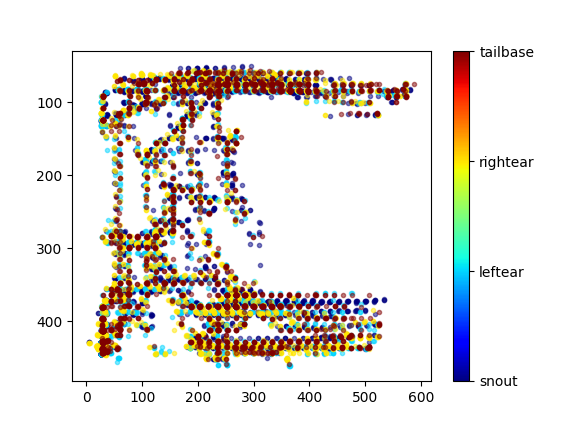

<IPython.core.display.Javascript object>


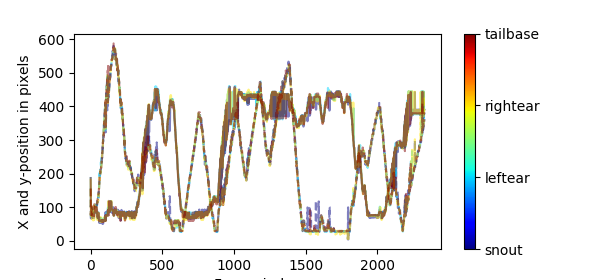

<IPython.core.display.Javascript object>


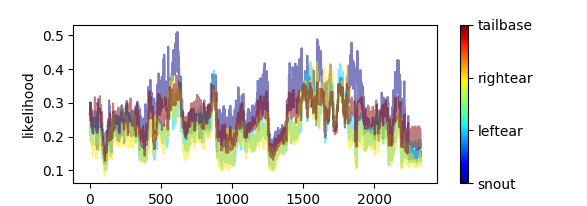

<IPython.core.display.Javascript object>


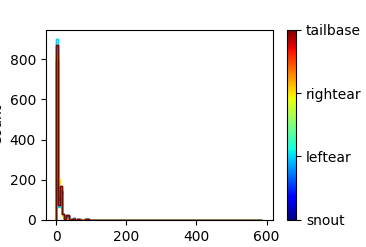

Plots created! Please check the directory "plot-poses" within the video directory


In [12]:
%matplotlib notebook
deeplabcut.plot_trajectories(path_config_file,[videofile_path],showfigures=True)

#These plots can are interactive and can be customized (see https://matplotlib.org/)

## Extract outlier frames, where the predictions are off.

This is optional step allows to add more training data when the evaluation results are poor. In such a case, the user can use the following function to extract frames where the labels are incorrectly predicted. Make sure to provide the correct value of the "iterations" as it will be used to create the unique directory where the extracted frames will be saved.

In [ ]:
deeplabcut.extract_outlier_frames(path_config_file,[videofile_path])

The user can run this iteratively, and (even) extract additional frames from the same video.

## Manually correct labels

This step allows the user to correct the labels in the extracted frames. Navigate to the folder corresponding to the video 'MovieS2_Perturbation_noLaser_compressed' and use the GUI as described in the protocol to update the labels.

In [ ]:
%gui wx
deeplabcut.refine_labels(path_config_file)

In [ ]:
#Perhaps plot the labels to see how how all the frames are annoted (including the refined ones)
deeplabcut.check_labels(path_config_file)

In [ ]:
# Now merge datasets (once you refined all frames)
deeplabcut.merge_datasets(path_config_file)

## Create a new iteration of training dataset, check it and train...

Following the refine labels, append these frames to the original dataset to create a new iteration of training dataset.

In [ ]:
deeplabcut.create_training_dataset(path_config_file)

Now one can train the network again... (with the expanded data set)

In [ ]:
deeplabcut.train_network(path_config_file, shuffle=1)